<a href="https://colab.research.google.com/github/ArunKumarSP10/newpub/blob/main/LoanCreditRanking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading neccessary extension for Data Processing.


In [ ]:
import pandas as pd
import io
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
import time
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# GPU Execution Prerequsite
import sys
import os
#import site
#sys.path.append(os.path.join(os.path.dirname(site.getsitepackages()[0]), "site-packages"))

In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/train.csv'

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
# Plot and Other Display Settings.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
training_df = pd.read_csv(file_path)

In [ ]:
training_df.columns

Index(['customer_id', 'firstname', 'lastname', 'record_number',
       'days_since_opened', 'days_since_confirmed', 'primary_term',
       'final_term', 'days_till_primary_close', 'days_till_final_close',
       'loans_credit_limit', 'loans_next_payment_summary',
       'loans_outstanding_balance', 'loans_max_overdue_amount',
       'loans_credit_cost_rate', 'loans_within_5_days',
       'loans_within_5_to_30_days', 'loans_within_30_to_60_days',
       'loans_within_60_to_90_days', 'loans_over_90_days',
       'is_zero_loans_within_5_days', 'is_zero_loans_within_5_to_30_days',
       'is_zero_loans_within_30_to_60_days',
       'is_zero_loans_within_60_to_90_days', 'is_zero_loans_over_90_days',
       'utilization', 'over_limit_count', 'max_over_limit_count',
       'is_zero_utilization', 'is_zero_over_limit_count',
       'is_zero_max_over_limit_count', 'encoded_payment_0',
       'encoded_payment_1', 'encoded_payment_2', 'encoded_payment_3',
       'encoded_payment_4', 'encoded_payme

In [ ]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106674 entries, 0 to 1106673
Data columns (total 62 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   customer_id                         1106674 non-null  object 
 1   firstname                           1106674 non-null  object 
 2   lastname                            1106674 non-null  object 
 3   record_number                       1106674 non-null  int64  
 4   days_since_opened                   1106674 non-null  int64  
 5   days_since_confirmed                1106674 non-null  int64  
 6   primary_term                        1106674 non-null  int64  
 7   final_term                          1106674 non-null  int64  
 8   days_till_primary_close             1106674 non-null  int64  
 9   days_till_final_close               1106674 non-null  int64  
 10  loans_credit_limit                  1106674 non-null  int64  
 11  loans_next_

In [ ]:
file_path1='/content/drive/My Drive/Colab Notebooks/test.csv'

In [ ]:
testing_df=pd.read_csv(file_path1)

In [ ]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474289 entries, 0 to 474288
Data columns (total 60 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   customer_id                         474289 non-null  object 
 1   firstname                           474289 non-null  object 
 2   lastname                            474289 non-null  object 
 3   record_number                       474289 non-null  int64  
 4   days_since_opened                   474289 non-null  int64  
 5   days_since_confirmed                474289 non-null  int64  
 6   primary_term                        474289 non-null  int64  
 7   final_term                          474289 non-null  int64  
 8   days_till_primary_close             474289 non-null  int64  
 9   days_till_final_close               474289 non-null  int64  
 10  loans_credit_limit                  474289 non-null  int64  
 11  loans_next_payment_summary

In [ ]:
dict(training_df.isnull().sum())

{'customer_id': 0,
 'firstname': 0,
 'lastname': 0,
 'record_number': 0,
 'days_since_opened': 0,
 'days_since_confirmed': 0,
 'primary_term': 0,
 'final_term': 0,
 'days_till_primary_close': 0,
 'days_till_final_close': 0,
 'loans_credit_limit': 0,
 'loans_next_payment_summary': 0,
 'loans_outstanding_balance': 0,
 'loans_max_overdue_amount': 0,
 'loans_credit_cost_rate': 0,
 'loans_within_5_days': 0,
 'loans_within_5_to_30_days': 0,
 'loans_within_30_to_60_days': 0,
 'loans_within_60_to_90_days': 0,
 'loans_over_90_days': 0,
 'is_zero_loans_within_5_days': 0,
 'is_zero_loans_within_5_to_30_days': 0,
 'is_zero_loans_within_30_to_60_days': 0,
 'is_zero_loans_within_60_to_90_days': 0,
 'is_zero_loans_over_90_days': 0,
 'utilization': 0,
 'over_limit_count': 0,
 'max_over_limit_count': 0,
 'is_zero_utilization': 0,
 'is_zero_over_limit_count': 0,
 'is_zero_max_over_limit_count': 0,
 'encoded_payment_0': 37619,
 'encoded_payment_1': 35744,
 'encoded_payment_2': 34612,
 'encoded_payment_3'

In [ ]:
def fill_missing_value(df):
  encoded_features = ['encoded_payment_' + str(i) for i in range(25)]
  Imputer=SimpleImputer(strategy='most_frequent')
  df[encoded_features] = Imputer.fit_transform(df[encoded_features])
  return df

In [ ]:
def drop_columns(df):
  drop_columns=['customer_id','firstname','lastname']
  df = df.drop(columns=drop_columns)
  return df

In [ ]:
def normalization(df):
    min_max_scaler = MinMaxScaler()
    label = ['primary_close_flag', 'final_close_flag']

    for column in df.columns:
        if column not in label and pd.api.types.is_numeric_dtype(df[column]):
            df[column] = min_max_scaler.fit_transform(df[[column]])
    return df

In [ ]:
def categorical_to_numerals(df):
    columns_to_encode = [
      'is_zero_loans_within_5_days',
      'is_zero_loans_within_5_to_30_days',
      'is_zero_loans_within_30_to_60_days',
      'is_zero_loans_within_60_to_90_days',
      'is_zero_loans_over_90_days',
      'is_zero_utilization',
      'is_zero_over_limit_count',
      'is_zero_max_over_limit_count'
      ]

    encoder = LabelEncoder()

    for column in columns_to_encode:
        df[column] = encoder.fit_transform(df[column])
    #print('column : ',df.columns)

    return df

In [ ]:
def preprocessing(df):
    print("Starting Step 1 : fill_missing_value")
    df = fill_missing_value(df)
    print("Step 1 : fill_missing_value Completed")
    print("Starting Step 2 : dropping Columns")
    df = drop_columns(df)
    print("Step 2 : dropping Columns Completed")
    print("Starting Step 3 : normalization")
    df = normalization(df)
    print("Step 3 : normalization Completed")
    print("Starting Step 4 : categorical_to_numerals")
    df = categorical_to_numerals(df)
    print("Step 4 : categorical_to_numerals Completed")
    return df

In [ ]:
training_df = preprocessing(training_df)

Starting Step 1 : fill_missing_value
Step 1 : fill_missing_value Completed
Starting Step 2 : dropping Columns
Step 2 : dropping Columns Completed
Starting Step 3 : normalization
Step 3 : normalization Completed
Starting Step 4 : categorical_to_numerals
Step 4 : categorical_to_numerals Completed


In [ ]:
testing_df = preprocessing(testing_df)


Starting Step 1 : fill_missing_value
Step 1 : fill_missing_value Completed
Starting Step 2 : dropping Columns
Step 2 : dropping Columns Completed
Starting Step 3 : normalization
Step 3 : normalization Completed
Starting Step 4 : categorical_to_numerals
Step 4 : categorical_to_numerals Completed


In [ ]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106674 entries, 0 to 1106673
Data columns (total 59 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   record_number                       1106674 non-null  float64
 1   days_since_opened                   1106674 non-null  float64
 2   days_since_confirmed                1106674 non-null  float64
 3   primary_term                        1106674 non-null  float64
 4   final_term                          1106674 non-null  float64
 5   days_till_primary_close             1106674 non-null  float64
 6   days_till_final_close               1106674 non-null  float64
 7   loans_credit_limit                  1106674 non-null  float64
 8   loans_next_payment_summary          1106674 non-null  float64
 9   loans_outstanding_balance           1106674 non-null  float64
 10  loans_max_overdue_amount            1106674 non-null  float64
 11  loans_credi

In [ ]:
training_df.columns

Index(['record_number', 'days_since_opened', 'days_since_confirmed',
       'primary_term', 'final_term', 'days_till_primary_close',
       'days_till_final_close', 'loans_credit_limit',
       'loans_next_payment_summary', 'loans_outstanding_balance',
       'loans_max_overdue_amount', 'loans_credit_cost_rate',
       'loans_within_5_days', 'loans_within_5_to_30_days',
       'loans_within_30_to_60_days', 'loans_within_60_to_90_days',
       'loans_over_90_days', 'is_zero_loans_within_5_days',
       'is_zero_loans_within_5_to_30_days',
       'is_zero_loans_within_30_to_60_days',
       'is_zero_loans_within_60_to_90_days', 'is_zero_loans_over_90_days',
       'utilization', 'over_limit_count', 'max_over_limit_count',
       'is_zero_utilization', 'is_zero_over_limit_count',
       'is_zero_max_over_limit_count', 'encoded_payment_0',
       'encoded_payment_1', 'encoded_payment_2', 'encoded_payment_3',
       'encoded_payment_4', 'encoded_payment_5', 'encoded_payment_6',
       'enco

In [ ]:
testing_df.columns

Index(['record_number', 'days_since_opened', 'days_since_confirmed',
       'primary_term', 'final_term', 'days_till_primary_close',
       'days_till_final_close', 'loans_credit_limit',
       'loans_next_payment_summary', 'loans_outstanding_balance',
       'loans_max_overdue_amount', 'loans_credit_cost_rate',
       'loans_within_5_days', 'loans_within_5_to_30_days',
       'loans_within_30_to_60_days', 'loans_within_60_to_90_days',
       'loans_over_90_days', 'is_zero_loans_within_5_days',
       'is_zero_loans_within_5_to_30_days',
       'is_zero_loans_within_30_to_60_days',
       'is_zero_loans_within_60_to_90_days', 'is_zero_loans_over_90_days',
       'utilization', 'over_limit_count', 'max_over_limit_count',
       'is_zero_utilization', 'is_zero_over_limit_count',
       'is_zero_max_over_limit_count', 'encoded_payment_0',
       'encoded_payment_1', 'encoded_payment_2', 'encoded_payment_3',
       'encoded_payment_4', 'encoded_payment_5', 'encoded_payment_6',
       'enco

**Exploratory Data Analysis**

In [ ]:
sum(training_df['primary_close_flag'] != training_df['final_close_flag'])/len(training_df)
# Checking Propotion of 2 Output Labels which different in primary and Final Flags

0.16817870483990768

In [ ]:
def split_data():
    #Splitting the data for Training
    label = ['primary_close_flag', 'final_close_flag']
    x = training_df.drop(columns=label)
    y = training_df[label]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)
    return x,y,x_train, x_test, y_train, y_test

In [ ]:
print("splitting data")
x,y,x_train, x_test, y_train, y_test = split_data()


splitting data


In [ ]:
x_train.dtypes

record_number                        float64
days_since_opened                    float64
days_since_confirmed                 float64
primary_term                         float64
final_term                           float64
                                      ...   
encoded_payment_24                   float64
encoded_loans_account_holder_type    float64
encoded_loans_credit_status          float64
encoded_loans_credit_type            float64
encoded_loans_account_currency       float64
Length: 57, dtype: object

In [ ]:
training_df.describe()

,record_number,days_since_opened,days_since_confirmed,primary_term,final_term,days_till_primary_close,days_till_final_close,loans_credit_limit,loans_next_payment_summary,loans_outstanding_balance,...,encoded_payment_21,encoded_payment_22,encoded_payment_23,encoded_payment_24,encoded_loans_account_holder_type,encoded_loans_credit_status,encoded_loans_credit_type,encoded_loans_account_currency,primary_close_flag,final_close_flag
count,1106674.0,1106674.0,1106674.0,1106674.0,1106674.0,1106674.0,1106674.0,1106674.0,1106674.0,1106674.0,...,1106674.0,1106674.0,1106674.0,1106674.0,1106674.0,1106674.0,1106674.0,1106674.0,1106674.0,1106674.0
mean,0.2,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.4,0.5,...,0.8,0.8,0.8,0.8,0.2,0.5,0.5,0.3,0.1,0.2
std,0.1,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.2,0.2,...,0.4,0.4,0.4,0.4,0.0,0.1,0.1,0.0,0.3,0.4
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.1,0.3,0.2,0.2,0.3,0.1,0.3,0.3,0.3,0.5,...,1.0,1.0,1.0,1.0,0.2,0.3,0.4,0.3,0.0,0.0
50%,0.2,0.5,0.5,0.5,0.5,0.4,0.6,0.5,0.3,0.5,...,1.0,1.0,1.0,1.0,0.2,0.5,0.6,0.3,0.0,0.0
75%,0.3,0.7,0.7,0.8,0.8,0.8,0.7,0.8,0.3,0.5,...,1.0,1.0,1.0,1.0,0.2,0.5,0.6,0.3,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**Predicting Outliers in the dataset**

In [ ]:
# summarize the shape of the before removing outliers
print(x_train.shape, y_train.shape)

(774671, 57) (774671, 2)


In [ ]:
#hist_plt = training_df.hist(figsize = (50,40),bins = 50)

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest


In [ ]:
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(x_train)

In [ ]:
# select all rows that are not outliers
mask = yhat != -1

In [ ]:
x_train = x_train[mask]

In [ ]:
y_train = y_train[mask]

In [ ]:
# summarize the shape after removal of outliers
print(x_train.shape, y_train.shape)

(697219, 57) (697219, 2)


**Understanding the importance of features and Feature Selection**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x_train,y_train)

In [ ]:
print(model.feature_importances_)

[1.15040887e-02 1.10707572e-02 2.51506386e-02 1.27440353e-01
 1.55684229e-01 1.58824760e-01 1.38873540e-01 7.47756612e-03
 1.91615265e-02 1.33291291e-02 2.87521228e-03 1.91933975e-02
 2.85495430e-05 1.69311567e-04 2.89285083e-08 0.00000000e+00
 9.61807807e-06 6.92604807e-03 7.04834717e-03 3.50693273e-04
 1.55434559e-04 3.11997150e-04 1.90954951e-02 2.04504734e-03
 3.36957855e-03 7.58382009e-02 2.59712766e-03 9.71700814e-03
 8.68138427e-03 3.82101316e-03 3.67382220e-03 2.93350910e-03
 2.60355936e-03 1.78174323e-03 1.60750470e-03 1.64861547e-03
 1.83699282e-03 1.35784148e-03 1.49592579e-03 2.00378644e-03
 1.76562307e-03 2.00232017e-03 2.98441386e-03 1.05481904e-03
 1.32782182e-03 1.41888034e-03 2.41135318e-03 1.73219789e-03
 2.19941019e-03 1.07528106e-03 1.94032614e-03 3.30982708e-03
 9.57588985e-03 6.22585520e-04 6.30099997e-02 5.17591739e-02
 1.16694237e-04]


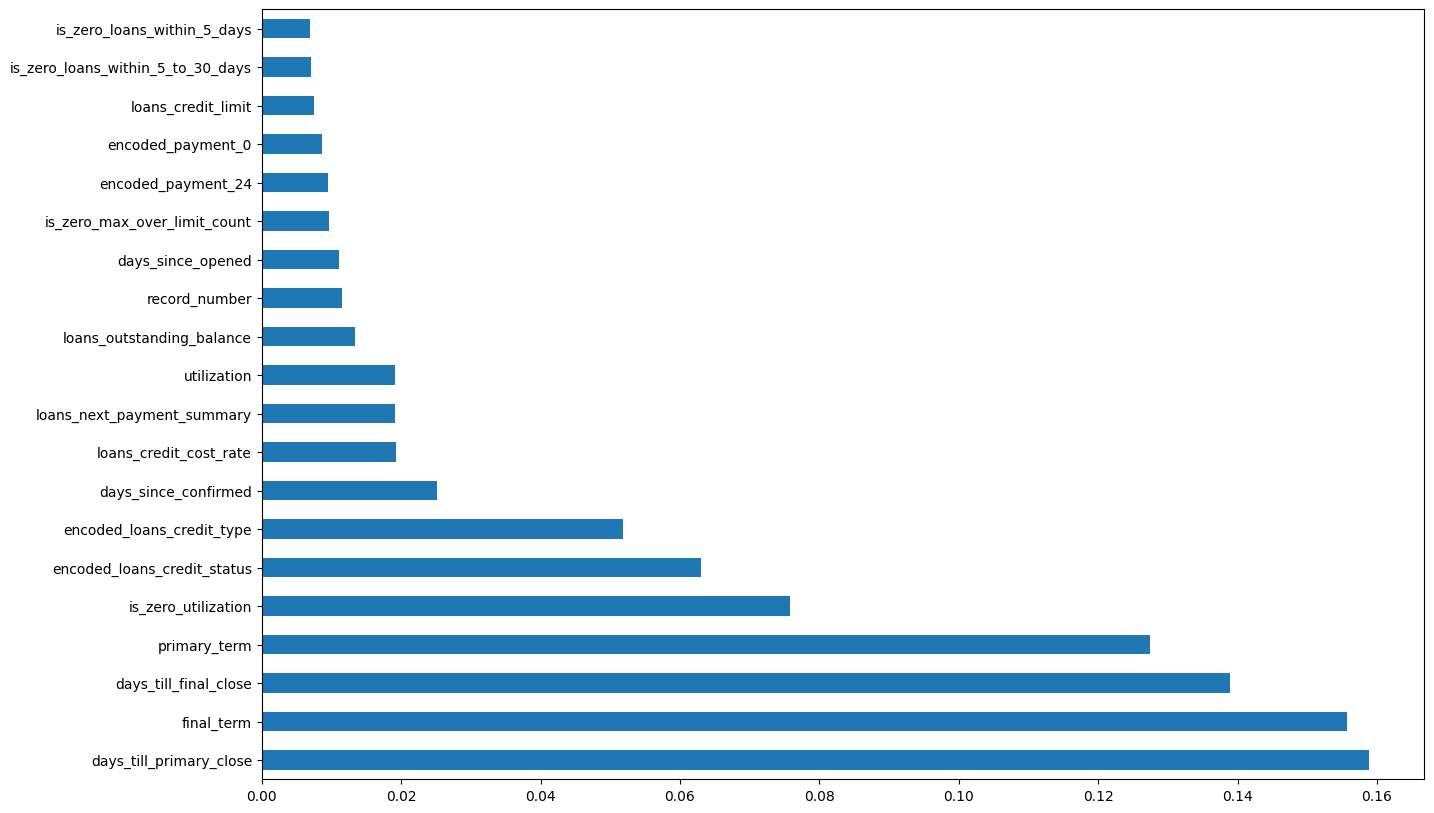

In [ ]:
plt.figure(figsize = [15,10])
ranked_features=pd.Series(model.feature_importances_,index=x_train.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
ranked_features.nlargest(20, keep='all')

days_till_primary_close             0.2
final_term                          0.2
days_till_final_close               0.1
primary_term                        0.1
is_zero_utilization                 0.1
                                     ..
encoded_payment_24                  0.0
encoded_payment_0                   0.0
loans_credit_limit                  0.0
is_zero_loans_within_5_to_30_days   0.0
is_zero_loans_within_5_days         0.0
Length: 20, dtype: float64

In [ ]:
x_train.corr()

,record_number,days_since_opened,days_since_confirmed,primary_term,final_term,days_till_primary_close,days_till_final_close,loans_credit_limit,loans_next_payment_summary,loans_outstanding_balance,...,encoded_payment_19,encoded_payment_20,encoded_payment_21,encoded_payment_22,encoded_payment_23,encoded_payment_24,encoded_loans_account_holder_type,encoded_loans_credit_status,encoded_loans_credit_type,encoded_loans_account_currency
record_number,1.0,-0.1,-0.0,-0.1,-0.0,0.0,0.2,-0.0,0.0,-0.0,...,0.1,0.2,0.2,0.2,0.2,0.1,-0.0,-0.4,0.1,-0.0
days_since_opened,-0.1,1.0,-0.0,0.0,0.0,-0.1,-0.0,0.0,0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
days_since_confirmed,-0.0,-0.0,1.0,0.0,0.0,0.1,-0.1,0.0,-0.0,0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0
primary_term,-0.1,0.0,0.0,1.0,0.1,0.2,-0.1,-0.0,-0.0,-0.0,...,0.1,0.1,0.1,0.1,0.1,0.0,-0.0,0.1,0.1,0.0
final_term,-0.0,0.0,0.0,0.1,1.0,0.1,0.0,-0.0,-0.0,0.0,...,-0.2,-0.2,-0.2,-0.2,-0.2,-0.1,0.0,-0.0,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
encoded_payment_24,0.1,-0.0,-0.0,0.0,-0.1,-0.0,-0.0,0.0,0.1,-0.0,...,0.7,0.7,0.8,0.8,0.8,1.0,-0.0,0.1,0.2,-0.0
encoded_loans_account_holder_type,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.1,0.0,-0.1,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.2,0.0
encoded_loans_credit_status,-0.4,0.0,0.0,0.1,-0.0,0.1,-0.2,0.0,-0.1,0.0,...,0.1,0.1,0.1,0.1,0.1,0.1,-0.0,1.0,0.2,0.0
encoded_loans_credit_type,0.1,0.0,-0.0,0.1,-0.0,0.2,-0.0,0.1,-0.0,0.1,...,0.2,0.2,0.2,0.2,0.2,0.2,-0.2,0.2,1.0,-0.0


In [ ]:
import seaborn as sns
corr=x_train.corr()
top_features=corr.index
plt.figure(figsize=(30,15))
sns.heatmap(x_train[top_features].corr(),annot=True)


**Creating Pipelines and Training Models**

In [ ]:
# For Model building and Training
from sklearn.metrics import accuracy_score, classification_report,f1_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def fit_model(classifier):
    class_model = classifier
    return class_model.fit(x_train,y_train)

In [ ]:
def predict(class_model,data_set):
    return class_model.predict(data_set)

In [ ]:
def print_accuracy(pred):
    # for classification we use accuracy and F1 score
    acc_score = accuracy_score(y_test,pred)
    print("Accuracy Score : ",acc_score)
    f_score = f1_score(y_test,pred,average='weighted')
    print("F1 Score : ",f_score)
    print("Multilabel Confusion Matrix:")
    print(multilabel_confusion_matrix(y_test, pred))
    print("Classification Report:")
    print(classification_report(y_test, pred))

In [ ]:
def predict_score(classifier_name):
    #Calculate Score of Classifier on test data
    score = classifier_name.score(x_test, y_test)
    print("Score on Test Data: ",score)

In [ ]:
def train_model(classifier):
    print("splitting data")
    x,y,x_train, x_test, y_train, y_test = split_data()
    print("fitting model")
    print("y_train")
    print(y_train.info())
    classifier_name = fit_model(classifier)
    # local()[var_name]
    print("Predicting x_test")
    predictions = predict(classifier_name,x_test)
    print("Printing accuracies")
    print_accuracy(predictions)
    predict_score(classifier_name)

    return classifier_name

**Decision Tree Classifier**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
#Splitting the data for Training
label = ['primary_close_flag', 'final_close_flag']
x = training_df.drop(columns=label)
y = training_df[label]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)
#test data contains 30% for testing, and random state = 30

In [ ]:
#DT_model = make_pipeline(MinMaxScaler(), DecisionTreeClassifier())
start_time = time.time()
DT_model= DecisionTreeClassifier()
DT_model.fit(x_train,y_train)
print('Time Take :  %s minutes' % ((time.time() - start_time)/60))

Time Take :  0.1471121033032735 minutes


In [ ]:
#Evaluating the model
# We use the predict() on the model to predict the output
start_time = time.time()
pred=DT_model.predict(x_test)
print('Time Take :  %s minutes' % ((time.time() - start_time)/60))

Time Take :  0.0019360065460205078 minutes


In [ ]:
#for classification we use accuracy and F1 score
acc_score = accuracy_score(y_test,pred)
print("Accuracy Score : ",acc_score)

# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy:", accuracy)
# print()

f_score = f1_score(y_test,pred,average='weighted')
print("F1 Score : ",f_score)

print("Multilabel Confusion Matrix:")
print(multilabel_confusion_matrix(y_test, pred))
print(" ")

print("Classification Report:")
print(classification_report(y_test, pred))

#Calculate Score of Classifier on test data
score = DT_model.score(x_test, y_test)
print("Score on Test Data: ",score)


Accuracy Score :  0.9998253027834085
F1 Score :  0.9997028811404515
Multilabel Confusion Matrix:
[[[289231     26]
  [    29  42717]]

 [[268722      6]
  [     2  63273]]]
 
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42746
           1       1.00      1.00      1.00     63275

   micro avg       1.00      1.00      1.00    106021
   macro avg       1.00      1.00      1.00    106021
weighted avg       1.00      1.00      1.00    106021
 samples avg       0.24      0.24      0.24    106021

Score on Test Data:  0.9998253027834085


**2. RandomForestClassifier**

In [ ]:
RandomForestClassifier = train_model(RandomForestClassifier())

splitting data
fitting model
y_train
<class 'pandas.core.frame.DataFrame'>
Int64Index: 774671 entries, 314016 to 431909
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   primary_close_flag  774671 non-null  int64
 1   final_close_flag    774671 non-null  int64
dtypes: int64(2)
memory usage: 17.7 MB
None
Predicting x_test
Printing accuracies
Accuracy Score :  0.9998825311819471
F1 Score :  0.9998113147244692
Multilabel Confusion Matrix:
[[[289250      7]
  [    29  42717]]

 [[268725      3]
  [     1  63274]]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42746
           1       1.00      1.00      1.00     63275

   micro avg       1.00      1.00      1.00    106021
   macro avg       1.00      1.00      1.00    106021
weighted avg       1.00      1.00      1.00    106021
 samples avg       0.24      0.24      0.24    10602

**KNN Classifier**

In [ ]:
params = {"n_neighbors": 5, "weights": "distance", "n_jobs": -1}
classifier = KNeighborsClassifier(**params)

In [ ]:
print("fitting model")
print("y_train")
print(y_train.info())
classifier_name = fit_model(classifier)
# local()[var_name]
print("Predicting x_test")
predictions = predict(classifier_name,x_test)
print("Printing accuracies")
print_accuracy(predictions)
predict_score(classifier_name)

fitting model
y_train
<class 'pandas.core.frame.DataFrame'>
Int64Index: 774671 entries, 314016 to 431909
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   primary_close_flag  774671 non-null  int64
 1   final_close_flag    774671 non-null  int64
dtypes: int64(2)
memory usage: 17.7 MB
None
Predicting x_test
Printing accuracies
Accuracy Score :  0.9328951846820661
F1 Score :  0.8846797280157356
Multilabel Confusion Matrix:
[[[283468   5789]
  [  4173  38573]]

 [[261773   6955]
  [  7641  55634]]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     42746
           1       0.89      0.88      0.88     63275

   micro avg       0.88      0.89      0.88    106021
   macro avg       0.88      0.89      0.88    106021
weighted avg       0.88      0.89      0.88    106021
 samples avg       0.21      0.21      0.21    106021

Score on Tes

**Predicting O/P on testing_df for submission.**

In [ ]:
def test_predict(model_obj,model_name):
    if type(model_name) != str:
        return false
    print("Predicting")
    predictions_sub = model_obj.predict(testing_df)
    print("DataFrame")
    df_submissions = pd.DataFrame({
        'primary_close_flag': predictions_sub[:, 0],
        'final_close_flag': predictions_sub[:, 1]
    })
    print("To_CSV")
    df_submissions.to_csv('/content/drive/MyDrive/Colab Notebooks/submit_'+model_name+'.csv', index=False)
    print("completed")

In [ ]:
x_train, y_train

(         record_number  days_since_opened  days_since_confirmed  primary_term  \
 314016             0.0                0.7                   0.8           0.6   
 485055             0.2                0.3                   0.6           0.4   
 935451             0.3                0.5                   0.1           0.2   
 597616             0.0                0.8                   0.2           0.7   
 1016969            0.0                0.8                   0.8           0.5   
 ...                ...                ...                   ...           ...   
 222339             0.1                0.7                   0.5           0.1   
 882485             0.6                0.6                   0.6           0.8   
 328599             0.2                0.9                   0.5           0.5   
 570508             0.2                0.0                   0.8           0.4   
 431909             0.1                0.0                   0.5           0.5   
 
          fina

**Fine Tuning Models and Validating it with Test Dataset**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
start = time.time()
# Create a base model
rf = RandomForestClassifier()

# Instantiate the randomized search model
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=3, random_state=42,n_jobs=-1)

# Fit the randomized search to the data
random_search_rf.fit(x_train, y_train)
print('Time Take :  %s minutes' % ((time.time() - start)/60))

# Get the best parameters
best_params_rf = random_search_rf.best_params_
best_estimator_rf = random_search_rf.best_estimator_
best_score_rf = random_search_rf.best_score_

Time Take :  85.6435750802358 minutes


In [ ]:
print('best_params_rf :',best_params_rf)
print('best_estimator_rf :',best_estimator_rf)
print('best_score_rf :',best_score_rf)

best_params_rf : {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}
best_estimator_rf : RandomForestClassifier()
best_score_rf : 0.999859295108879


**Fine Tuning for DescisionTree**

In [ ]:
#Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10,15,20]
}
start_time = time.time()
# Create a base model
dt = DecisionTreeClassifier()

# Instantiate the randomized search model
random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_grid, n_iter=100, cv=5,verbose=2, random_state=42,n_jobs=-1)
#First Try for cv = 3, but less computation
#later Try for cv = 5, but more computation
# Fit the randomized search to the data
random_search.fit(x_train, y_train)

# Get the best parameters
best_params_1 = random_search.best_params_
best_estimator_1 = random_search.best_estimator_
best_score_1 = random_search.best_score_

print('Time Take :  %s minutes' % ((time.time() - start_time)/60))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Time Take :  19.154699031511942 minutes


In [ ]:
print('best_params_1 :',best_params_1)
print('best_estimator_1 :',best_estimator_1)
print('best_score_1 :',best_score_1)

best_params_1 : {'min_samples_split': 10, 'max_depth': 30, 'criterion': 'entropy'}
best_estimator_1 : DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_split=10)
best_score_1 : 0.9998412228974853


**Fine Tuning for KNN**

In [ ]:
# Define the parameter grid
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
start_time = time.time()
# Create a base model
knn = KNeighborsClassifier()

# Instantiate the randomized search model
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_grid, n_iter=100, cv=3, random_state=42)

# Fit the randomized search to the data
random_search.fit(x_train, y_train)
print('Time Take :  %s minutes' % ((time.time() - start_time)/60))
# Get the best parameters
best_params_2 = random_search.best_params_

**Testing the final model against Original Unused Test Dataset and Getting the score**

In [ ]:
x_train_final = training_df.drop(columns=label)
y_train_final = training_df[label]

In [ ]:
#for Reference:
x_test_final = testing_df #Testing data without label used for predicting
y_test_final = submission_df # Test Data Set labels

In [ ]:
#final_model = DecisionTreeClassifier(criterion='entropy', min_samples_split=10)

In [ ]:
final_model= RandomForestClassifier(n_estimators=100, min_samples_split= 2, max_depth= None)

In [ ]:
start = time.time()
final_model.fit(x_train_final, y_train_final)
print('Time Take :  %s minutes' % ((time.time() - start)/60))

In [ ]:
print("Predicting")
start = time.time()
predictions_sub = final_model.predict(testing_df)
print('Time Take :  %s minutes' % ((time.time() - start)/60))
print("DataFrame")
dt_f_submissions = pd.DataFrame({
    'primary_close_flag': predictions_sub[:, 0],
    'final_close_flag': predictions_sub[:, 1]
})

**Creating Submit csv with Predicted Values.**

In [ ]:
print("To_CSV")
dt_f_submissions.to_csv('/content/drive/MyDrive/Colab Notebooks/submitDT_fine.csv', index=False)
print("completed")

In [ ]:
#test_predict(classifier_name,'KNNClassifier')

In [ ]:
print("Predicting")
predictions_sub = DT_model.predict(testing_df)
print("DataFrame")
df_submissions = pd.DataFrame({
    'primary_close_flag': predictions_sub[:, 0],
    'final_close_flag': predictions_sub[:, 1]
})


In [ ]:
print("To_CSV")
df_submissions.to_csv('/content/submitDT.csv', index=False)
print("completed")